# Exercise 1 - Probability Theory and Statistics

## Problem 1

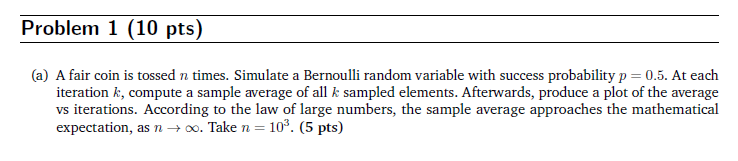

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# import packages

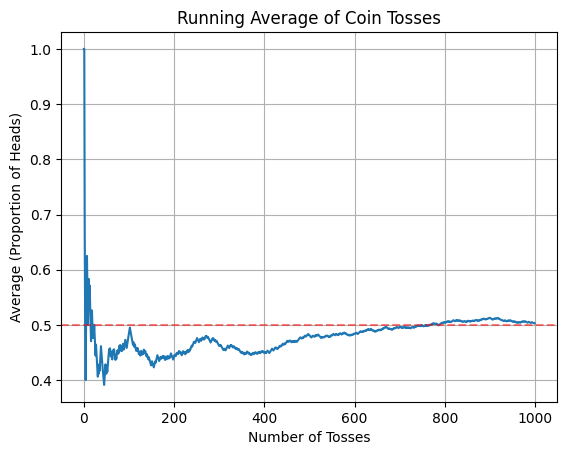

In [ ]:
# np.random.choice:
# a: list of possible values to sample from
# p: list of probabilities associated with each value in 'a' (p[i] is the probability of selecting a[i])
# size: number of samples to generate
# Returns a np array with 'size' samples drawn from the discrete distribution defined by 'a' and 'p'
coin_results = np.random.choice(a=[0, 1], p=[0.5, 0.5], size=1000)


# averages[i] stores the average between the (i+1)-first elements
averages = [np.mean(coin_results[:i+1]) for i in range(1000)]

# plot
plt.plot(averages)
plt.title('Running Average of Coin Tosses')
plt.xlabel('Number of Tosses')
plt.ylabel('Average (Proportion of Heads)')
plt.grid(True)
# constant horizontal line with y=0.5
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)


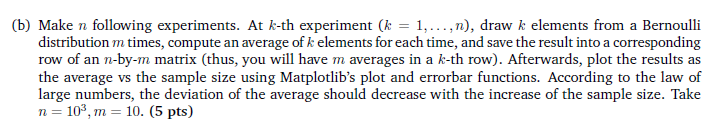

<ErrorbarContainer object of 3 artists>

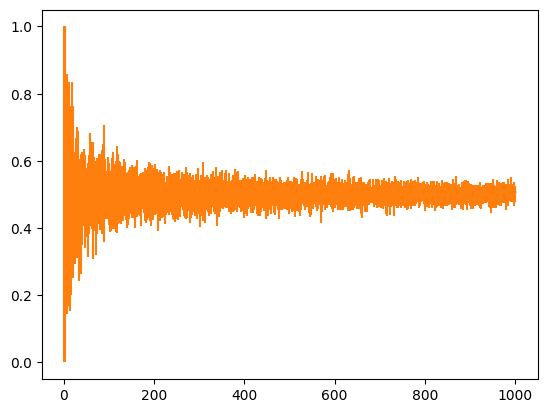

In [ ]:

n = 1000
m = 10

results = np.zeros((n, m))

for k in range(1, n+1):
    # Each k_th experiment will store m values
    # each value will be an average after the end of a process
    k_th_experiment = [np.mean(np.random.choice(a=[0,1], p=[0.5, 0.5], size=k)) for i in range(m)]
    results[k-1] = k_th_experiment

# values that will be inputed in plt.errorbar
row_means = np.mean(results, axis=1)

y_errormin = row_means - np.min(results, axis=1)
y_errormax = np.max(results, axis=1) - row_means

y_error = [y_errormin, y_errormax]

plt.plot(range(1,n+1), row_means)
plt.errorbar(range(1,n+1), row_means, yerr=y_error)

## Problem 2

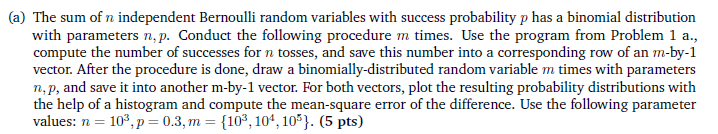

In [6]:
def mse(x):
    x_hat = np.mean(x)
    return np.mean(np.square(x - x_hat))

MSE of the difference (binomial - successes): 421.371671
MSE of the difference (binomial - successes): 423.44197984
MSE of the difference (binomial - successes): 418.8386123900001


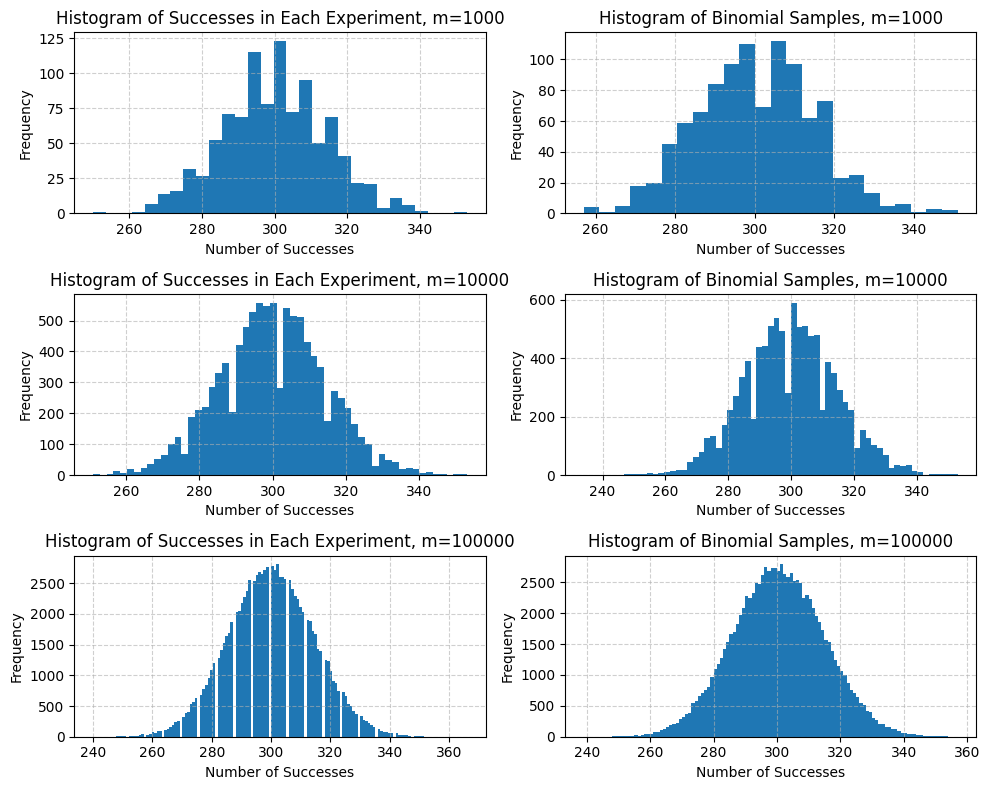

In [27]:
def compare_with_binomial(n, p, m, subplot_idx):
    successes_of_each_experiment = np.zeros((1, m))

    for i in range(m):
        coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=n)
        successes_of_each_experiment[0, i] = np.sum(coin_results)

    binomial = np.random.binomial(n, p, size=m)

    plt.subplot(3, 2, subplot_idx)
    plt.hist(successes_of_each_experiment.T, bins='auto')
    plt.title(f'Histogram of Successes in Each Experiment, m={m}')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(3, 2, subplot_idx + 1)
    plt.hist(binomial, bins='auto')
    plt.title(f'Histogram of Binomial Samples, m={m}')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()

    difference_vector = binomial - successes_of_each_experiment
    mse_difference = mse(binomial - successes_of_each_experiment)
    # print(f'Mean {np.mean(binomial - successes_of_each_experiment)}')
    print(f'MSE of the difference (binomial - successes): {mse_difference}')

n = 1000
p = 0.3
m = 100000

plt.figure(figsize=(10, 8))

compare_with_binomial(n, p, 1000, 1)
compare_with_binomial(n, p, 10000, 3)
compare_with_binomial(n, p, 100000, 5)

plt.show()

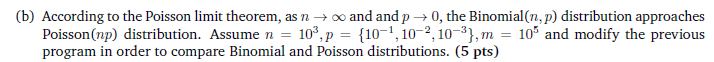


p=0.1 :
Mean Error with binomial: -0.00675
MSE binomial: 180.2968044375
Mean Error with Poisson: 0.01699
MSE Poisson: 189.33372133989997
Mean Error between Poisson and Binomial: 0.01699
MSE between Poisson and Binomial: 189.33372133989997

p=0.01 :
Mean Error with binomial: 0.00233
MSE binomial: 19.875664571100003
Mean Error with Poisson: 0.01691
MSE Poisson: 19.672404051900003
Mean Error between Poisson and Binomial: 0.01691
MSE between Poisson and Binomial: 19.672404051900003

p=0.001 :
Mean Error with binomial: -0.00172
MSE binomial: 1.9886970416
Mean Error with Poisson: 0.00563
MSE Poisson: 1.9960183031000003
Mean Error between Poisson and Binomial: 0.00563
MSE between Poisson and Binomial: 1.9960183031000003


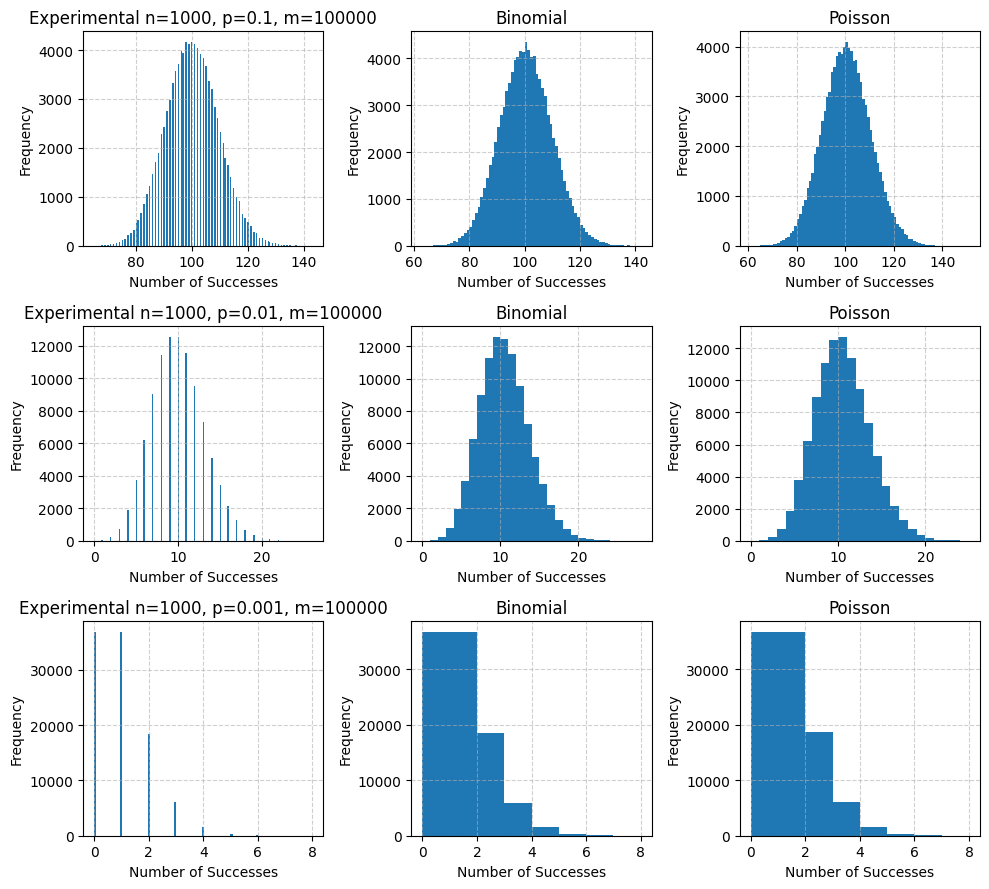

In [26]:
def compare_binomial_and_poisson(n, p, m, n_bins, subplot_idx):
    successes_of_each_experiment = np.zeros((1, m))

    for i in range(m):
        coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=n)
        successes_of_each_experiment[0, i] = np.sum(coin_results)

    binomial = np.random.binomial(n, p, size=m)
    poisson = np.random.poisson(n* p, size=m)
    
    plt.subplot(3, 3, subplot_idx)
    plt.hist(successes_of_each_experiment.T, bins=n_bins)
    plt.title(f'Experimental n={n}, p={p}, m={m}')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(3, 3, subplot_idx + 1)
    plt.hist(binomial, bins=n_bins)
    plt.title('Binomial')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(3, 3, subplot_idx + 2)
    plt.hist(poisson, bins=n_bins)
    plt.title('Poisson')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()

    print()
    print(f'p={p} :')
    # difference_vector = binomial - successes_of_each_experiment
    mse_difference = mse(binomial - successes_of_each_experiment)
    print(f'Mean Error with binomial: {np.mean(binomial - successes_of_each_experiment)}')
    print(f'MSE binomial: {mse_difference}')

    mse_difference = mse(poisson - successes_of_each_experiment)
    print(f'Mean Error with Poisson: {np.mean(poisson - successes_of_each_experiment)}')
    print(f'MSE Poisson: {mse_difference}')

    mse_difference = mse(poisson - successes_of_each_experiment)
    print(f'Mean Error between Poisson and Binomial: {np.mean(poisson - successes_of_each_experiment)}')
    print(f'MSE between Poisson and Binomial: {mse_difference}')

plt.figure(figsize=(10, 9))

compare_binomial_and_poisson(1000, 0.1, 100000, 'auto', 1)
compare_binomial_and_poisson(1000, 0.01, 100000, 'auto', 4)
compare_binomial_and_poisson(1000, 0.001, 100000, 'auto', 7)

plt.show()